# Pré-processamento de dados: limpeza, normalização e transformação

# 1 Importação das bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2 Carregamento do dataset

O dataset "Heart Disease" contém informações médicas de pacientes, coletadas para estudar a presença de doenças cardíacas. Ele possui 14 atributos, que são:

- Principais Características do Dataset:
    - age: Idade
    - sex: Sexo (1 = masculino, 0 = feminino)
    - cp: Tipo de dor no peito (1 a 4)
    - trestbps: Pressão arterial em repouso
    - chol: Colesterol sérico em mg/dl
    - fbs: Açúcar no sangue em jejum (1 = verdadeiro, 0 = falso)
    - restecg: Resultados do eletrocardiograma em repouso (0 a 2)
    - thalach: Frequência cardíaca máxima atingida
    - exang: Angina induzida por exercício (1 = sim, 0 = não)
    - oldpeak: Depressão do segmento ST induzida por exercício em relação ao repouso
    - slope: Inclinação do segmento ST no pico do exercício (1 a 3)
    - ca: Número de vasos principais (0-3) coloridos por fluoroscopia
    - thal: Talassemia (3 = normal, 6 = fixo, 7 = reversível)
    - target: Diagnóstico de doença cardíaca (0 = ausência, 1 a 4 = presença)

- Importância das Variáveis:
    - age: A idade é um fator de risco importante para doenças cardíacas.
    - sex: O sexo pode influenciar a probabilidade de doenças cardíacas.
    - cp: O tipo de dor no peito fornece informações sobre possíveis condições cardíacas.
    - trestbps: A pressão arterial elevada pode estar associada a doenças cardíacas.
    - chol: Níveis altos de colesterol estão relacionados a um maior risco de doenças cardíacas.
    - fbs: A presença de açúcar no sangue em jejum é um fator de risco para doenças cardíacas.
    - restecg: Anomalidades no eletrocardiograma em repouso podem indicar problemas cardíacos.
    - thalach: Uma frequência cardíaca máxima baixa pode estar associada a problemas cardíacos.
    - exang: A angina induzida por exercício pode ser um sinal de doença cardíaca.
    - oldpeak: A depressão do segmento ST pode indicar isquemia cardíaca.
    - slope: A inclinação do segmento ST pode fornecer informações adicionais sobre a gravidade da doença.
    - ca: O número de vasos coloridos pode indicar a presença de doença arterial coronariana.
    - thal: Diferentes tipos de talassemia podem influenciar o risco de doenças cardíacas.
    - target: A variável alvo indica a presença ou ausência de doenças cardíacas e é a principal variável para predição.

- Fonte do Dataset
    - O dataset está originalmente disponível em: UCI Machine Learning Repository
    - Para carregar o dataset em um DataFrame do pandas:

        import pandas as pd

        url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

        df = pd.read_csv(url, delimiter=';')

In [2]:
df = pd.read_csv('datasets/processed_cleveland_data.csv', delimiter=",")

# 3 Análise inicial do dataset

## 3.1 Primeiras linhas do dataset

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,?,145.0,233.0,1.0,2.0,150.0,0.0,?,3.0,0.0,6.0,0
1,67.0,?,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,?,0.0,2.0,129.0,?,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,?,?,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 3.2 Informações do dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       303 non-null    object
 1   sex       303 non-null    object
 2   cp        303 non-null    object
 3   trestbps  303 non-null    object
 4   chol      303 non-null    object
 5   fbs       303 non-null    object
 6   restecg   303 non-null    object
 7   thalach   303 non-null    object
 8   exang     303 non-null    object
 9   oldpeak   303 non-null    object
 10  slope     303 non-null    object
 11  ca        299 non-null    object
 12  thal      301 non-null    object
 13  target    303 non-null    int64 
dtypes: int64(1), object(13)
memory usage: 33.3+ KB


## 3.3 Estatísticas descritivas do dataset

In [5]:
df.describe()

,target
count,303.000000
mean,0.937294
std,1.228536
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,4.000000


# 4 Limpeza de dados

## 4.1 Substituição dos valores faltantes (representados por '?')

In [6]:
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric)

## 4.2 Imputação dos valores faltantes com a média da coluna

In [7]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

## 4.3 Dataset após imputação de valores faltantes

In [8]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


# 5 Normalização dos dados

In [9]:
# Separar a coluna target
target = df_imputed['target']
features = df_imputed.drop(columns=['target'])

# Escalar as features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Criar um DataFrame com as features escalonadas
df_scaled_features = pd.DataFrame(scaled_features, columns=features.columns)

# Adicionar a coluna target de volta ao DataFrame
df_scaled = pd.concat([df_scaled_features, target.reset_index(drop=True)], axis=1)

## 5.1 Dataset após normalização

In [10]:
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.004174,0.726600,0.000000,0.797606,-0.293851,2.436518e+00,1.088894,0.011867,-7.266001e-01,-2.002690e-16,2.367672,-0.763692,0.680971,0.0
1,1.478258,0.000000,0.941535,1.699621,0.782809,-4.555230e-01,1.088894,-1.960125,1.527512e+00,4.238747e-01,0.671151,2.641276,-0.956986,2.0
2,1.478258,0.726600,0.941535,-0.705753,0.000000,-4.555230e-01,1.088894,-0.974129,1.251283e-16,1.415999e+00,0.671151,1.506287,1.226957,1.0
3,-2.077376,0.726600,-0.166392,-0.104409,0.051493,-4.555230e-01,-1.034449,1.749098,-7.266001e-01,2.227738e+00,2.367672,-0.763692,-0.956986,0.0
4,-1.603291,-1.527512,-1.274320,-0.104409,0.000000,8.027027e-17,1.088894,1.044815,-7.266001e-01,3.336816e-01,-1.025370,-0.763692,-0.956986,0.0


# Machine Learning Section

# 6 Separação dos dados brutos em treino e teste

In [11]:
X_raw = df_imputed.drop('target', axis=1)
y_raw = df_imputed['target']
X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

# 7 Modelo de Machine Learning com dados brutos

## 7.1 Treinamento com dados brutos

In [12]:
model_raw = LogisticRegression(random_state=42)
model_raw.fit(X_raw_train, y_raw_train)
y_pred_raw = model_raw.predict(X_raw_test)

c:\Users\filip\GitHub\FIAP-Feature-Engineering\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 7.2 Métricas de desempenho

In [13]:
accuracy_raw = accuracy_score(y_raw_test, y_pred_raw)
conf_matrix_raw = confusion_matrix(y_raw_test, y_pred_raw)

In [14]:
print("Acurácia do modelo com dados brutos:", accuracy_raw)

Acurácia do modelo com dados brutos: 0.5573770491803278


In [15]:
print("Matriz de confusão do modelo com dados brutos:")
print(conf_matrix_raw)

Matriz de confusão do modelo com dados brutos:
[[27  0  2  0  0]
 [ 6  3  0  3  0]
 [ 2  2  1  4  0]
 [ 1  2  1  3  0]
 [ 0  0  3  1  0]]


# 8 Separação dos dados tratados em treino e teste

In [16]:
X_treated = df_scaled.drop('target', axis=1)
y_treated = df_scaled['target']
X_treated_train, X_treated_test, y_treated_train, y_treated_test = train_test_split(X_treated, y_treated, test_size=0.2, random_state=42)

# 9 Modelo de Machine Learning com dados tratados

## 9.1 Treinamento com dados tratados

In [17]:
model_treated = LogisticRegression(random_state=42)
model_treated.fit(X_treated_train, y_treated_train)
y_pred_treated = model_treated.predict(X_treated_test)

## 9.2 Métricas de desempenho

In [18]:
accuracy_treated = accuracy_score(y_treated_test, y_pred_treated)
conf_matrix_treated = confusion_matrix(y_treated_test, y_pred_treated)

In [19]:
print("Acurácia do modelo com dados tratados:", accuracy_treated)

Acurácia do modelo com dados tratados: 0.5245901639344263


# 10 Comparação de resultados

## 10.1 Plot da matriz de confusão

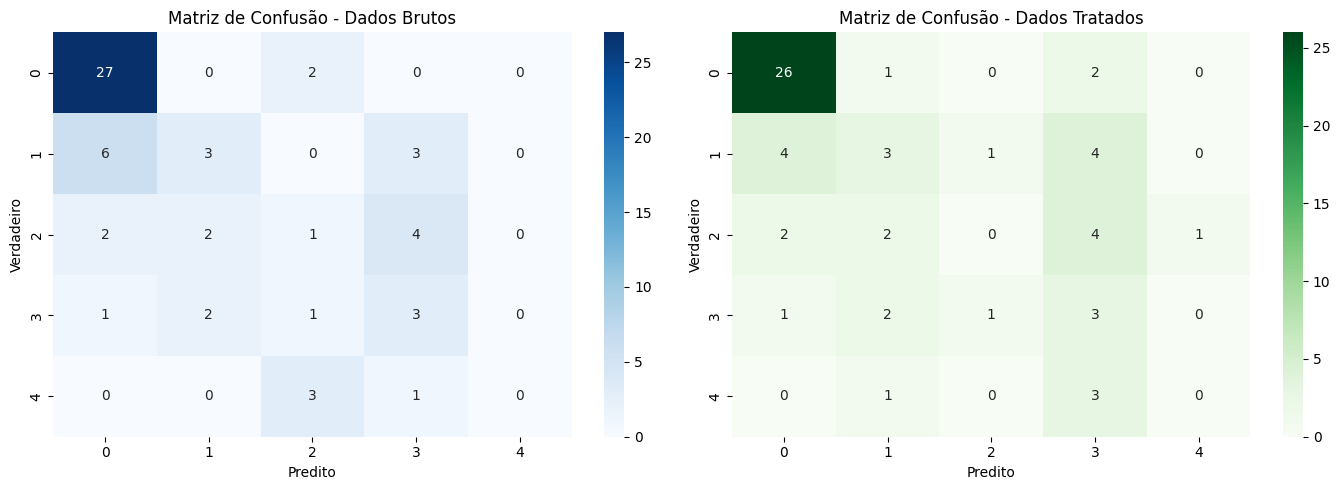

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(conf_matrix_raw, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Matriz de Confusão - Dados Brutos')
ax[0].set_xlabel('Predito')
ax[0].set_ylabel('Verdadeiro')

sns.heatmap(conf_matrix_treated, annot=True, fmt='d', ax=ax[1], cmap='Greens')
ax[1].set_title('Matriz de Confusão - Dados Tratados')
ax[1].set_xlabel('Predito')
ax[1].set_ylabel('Verdadeiro')

plt.tight_layout()
plt.show()

## 10.2 Comparação das acurácias

In [21]:
print("Acurácia com dados brutos:", accuracy_raw)
print("Acurácia com dados tratados:", accuracy_treated)

Acurácia com dados brutos: 0.5573770491803278
Acurácia com dados tratados: 0.5245901639344263
